In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold

In [2]:
# read the training and test data
df1 = pd.read_csv('./project4/illegal_fishing_trn_data.csv', on_bad_lines = 'skip')
df2 = pd.read_csv('./project4/illegal_fishing_tst_data.csv', on_bad_lines = 'skip')
df3 = pd.read_csv('./project4/illegal_fishing_trn_class_labels.csv', on_bad_lines = 'skip')

In [3]:
df1.shape #dimension

(838860, 8)

In [4]:
mapping = {1: 'fishing', 0:'not_fishing',-1: 'no_label'}

In [5]:
df3['-1'] = df3['-1'].map(mapping);
df3

,d1,-1
0,d2,no_label
1,d3,no_label
2,d4,no_label
3,d5,no_label
4,d6,no_label
...,...,...
838854,d838856,no_label
838855,d838857,no_label
838856,d838858,no_label
838857,d838859,no_label


In [6]:
#Preprocessing data
df_train = df1 # whole training dataset
df_labels = df3.drop(columns = ['d1']) # whole training labels
df_train.describe() #details of our retrieved training dataset

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838857.000000,838857.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344641,52.284092,5.946398
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747304,114.404061,7.487147,11.325362
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651


In [7]:
df_train = df_train.dropna()


In [8]:
#Preprocessing data for visualizing each activity contribution
frames = [df_train, df_labels]
df = pd.concat(frames, axis=1)
df.rename(columns ={"-1":"label"}, inplace= True)
df = df.dropna()
df

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,label
0,1.214265e+14,1.392605e+09,62239.937500,69998.281250,10.3,70.000000,50.052689,-1.631830,no_label
1,1.252340e+12,1.456972e+09,42952.410156,52477.277344,5.4,93.000000,20.688517,-17.457317,no_label
2,1.217392e+14,1.428162e+09,0.000000,2999.926270,0.0,99.000000,56.518200,20.990850,no_label
3,1.414316e+14,1.438086e+09,0.000000,999.975464,0.0,320.899994,42.356224,14.414068,no_label
4,1.985955e+13,1.438332e+09,11401.474609,49647.546875,3.1,129.100006,53.902554,8.275746,no_label
...,...,...,...,...,...,...,...,...,...
838854,5.110130e+13,1.342748e+09,0.000000,70347.406250,0.0,292.700012,53.408848,6.202929,no_label
838855,5.110130e+13,1.372087e+09,0.000000,10049.628906,0.0,343.600006,52.914463,4.797502,no_label
838856,5.145483e+12,1.440924e+09,0.000000,1999.950928,0.0,335.000000,57.695148,-2.002600,no_label
838857,3.491170e+13,1.446407e+09,136689.734375,181907.593750,2.3,183.500000,55.434978,18.964701,no_label


In [9]:
from collections import Counter

def count_unique_labels(labels):
    # Use Counter to count occurrences of each label
    label_counts = Counter(labels)
    
    # Print the results
    print("Class Label Counts:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")


In [10]:
count_unique_labels(df_labels['-1'])

Class Label Counts:
no_label: 802827
not_fishing: 30237
fishing: 5795


# Visualizing the data in a pie chart

Text(0.5, 1.05, 'A pie chart for different activities')

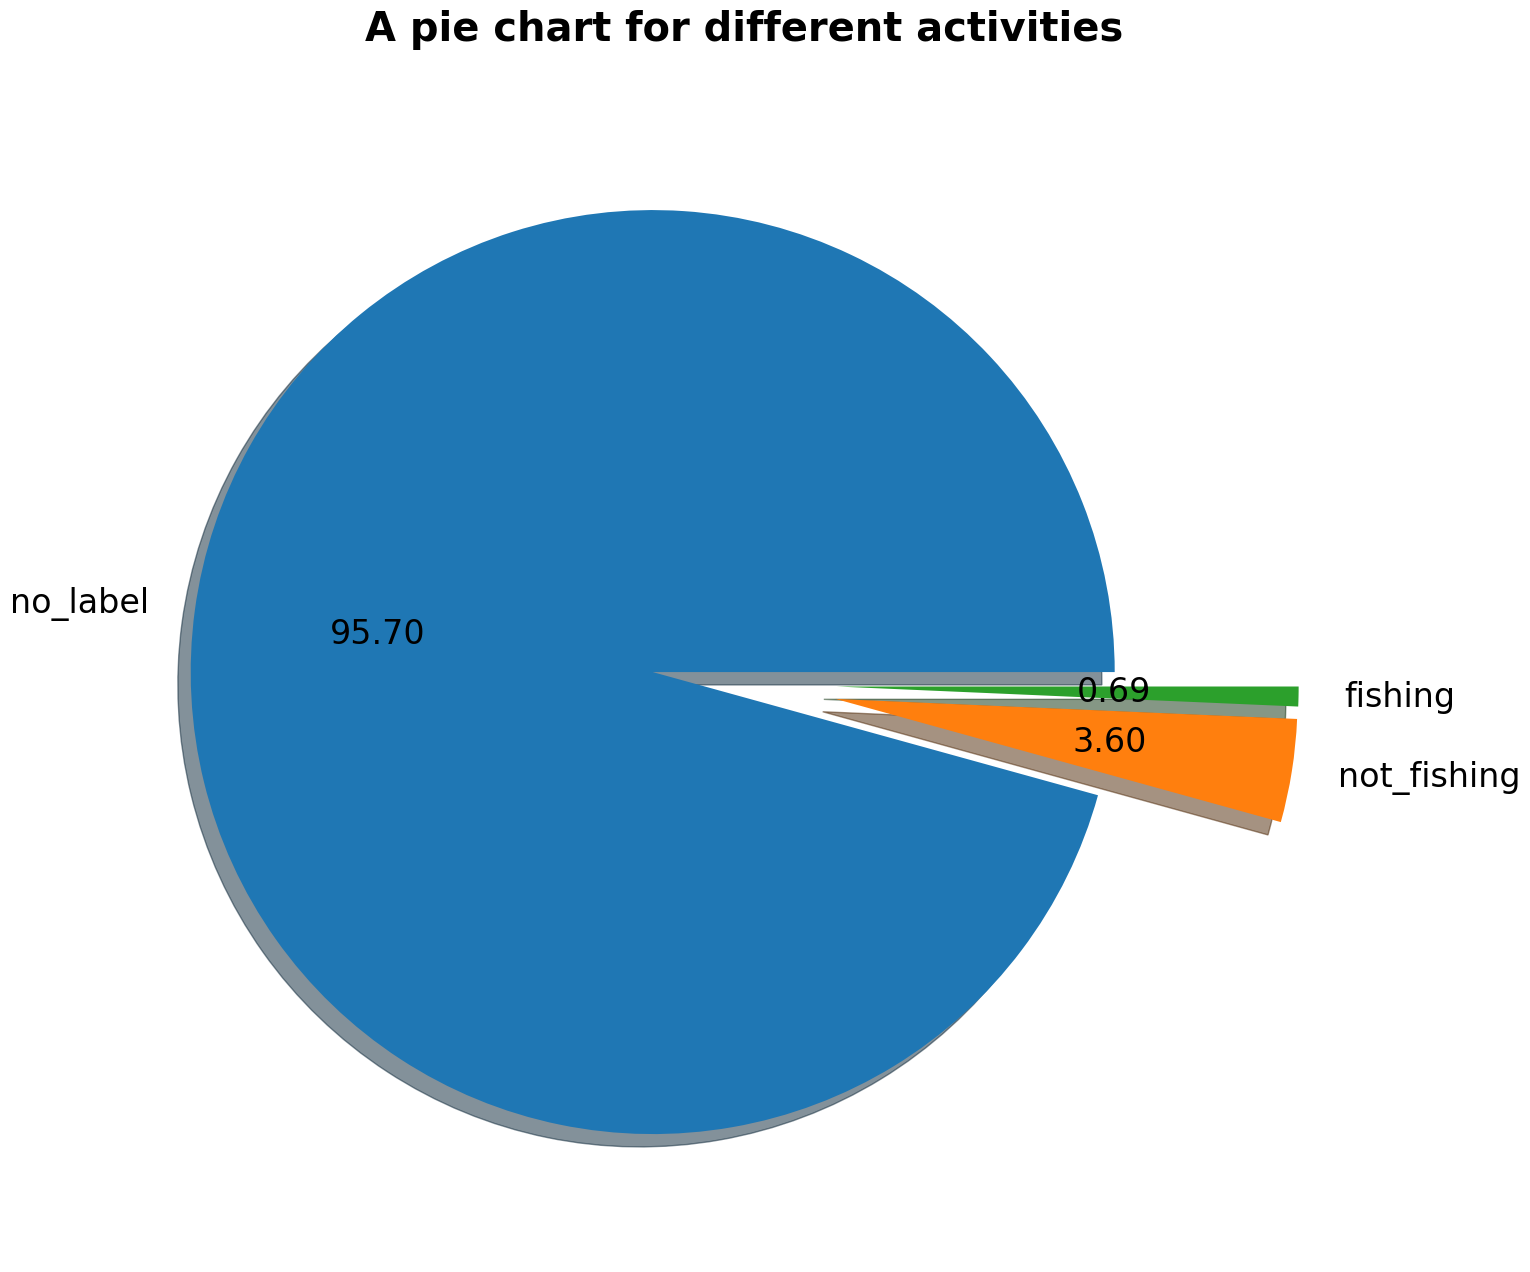

In [11]:
count_of_each_activity = np.array(df['label'].value_counts())
activities = df['label'].unique()
activities

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities,explode=[0.2,0.2,0.2],shadow = True, autopct = '%0.2f')
plt.title("A pie chart for different activities", fontweight='bold', y = 1.05)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


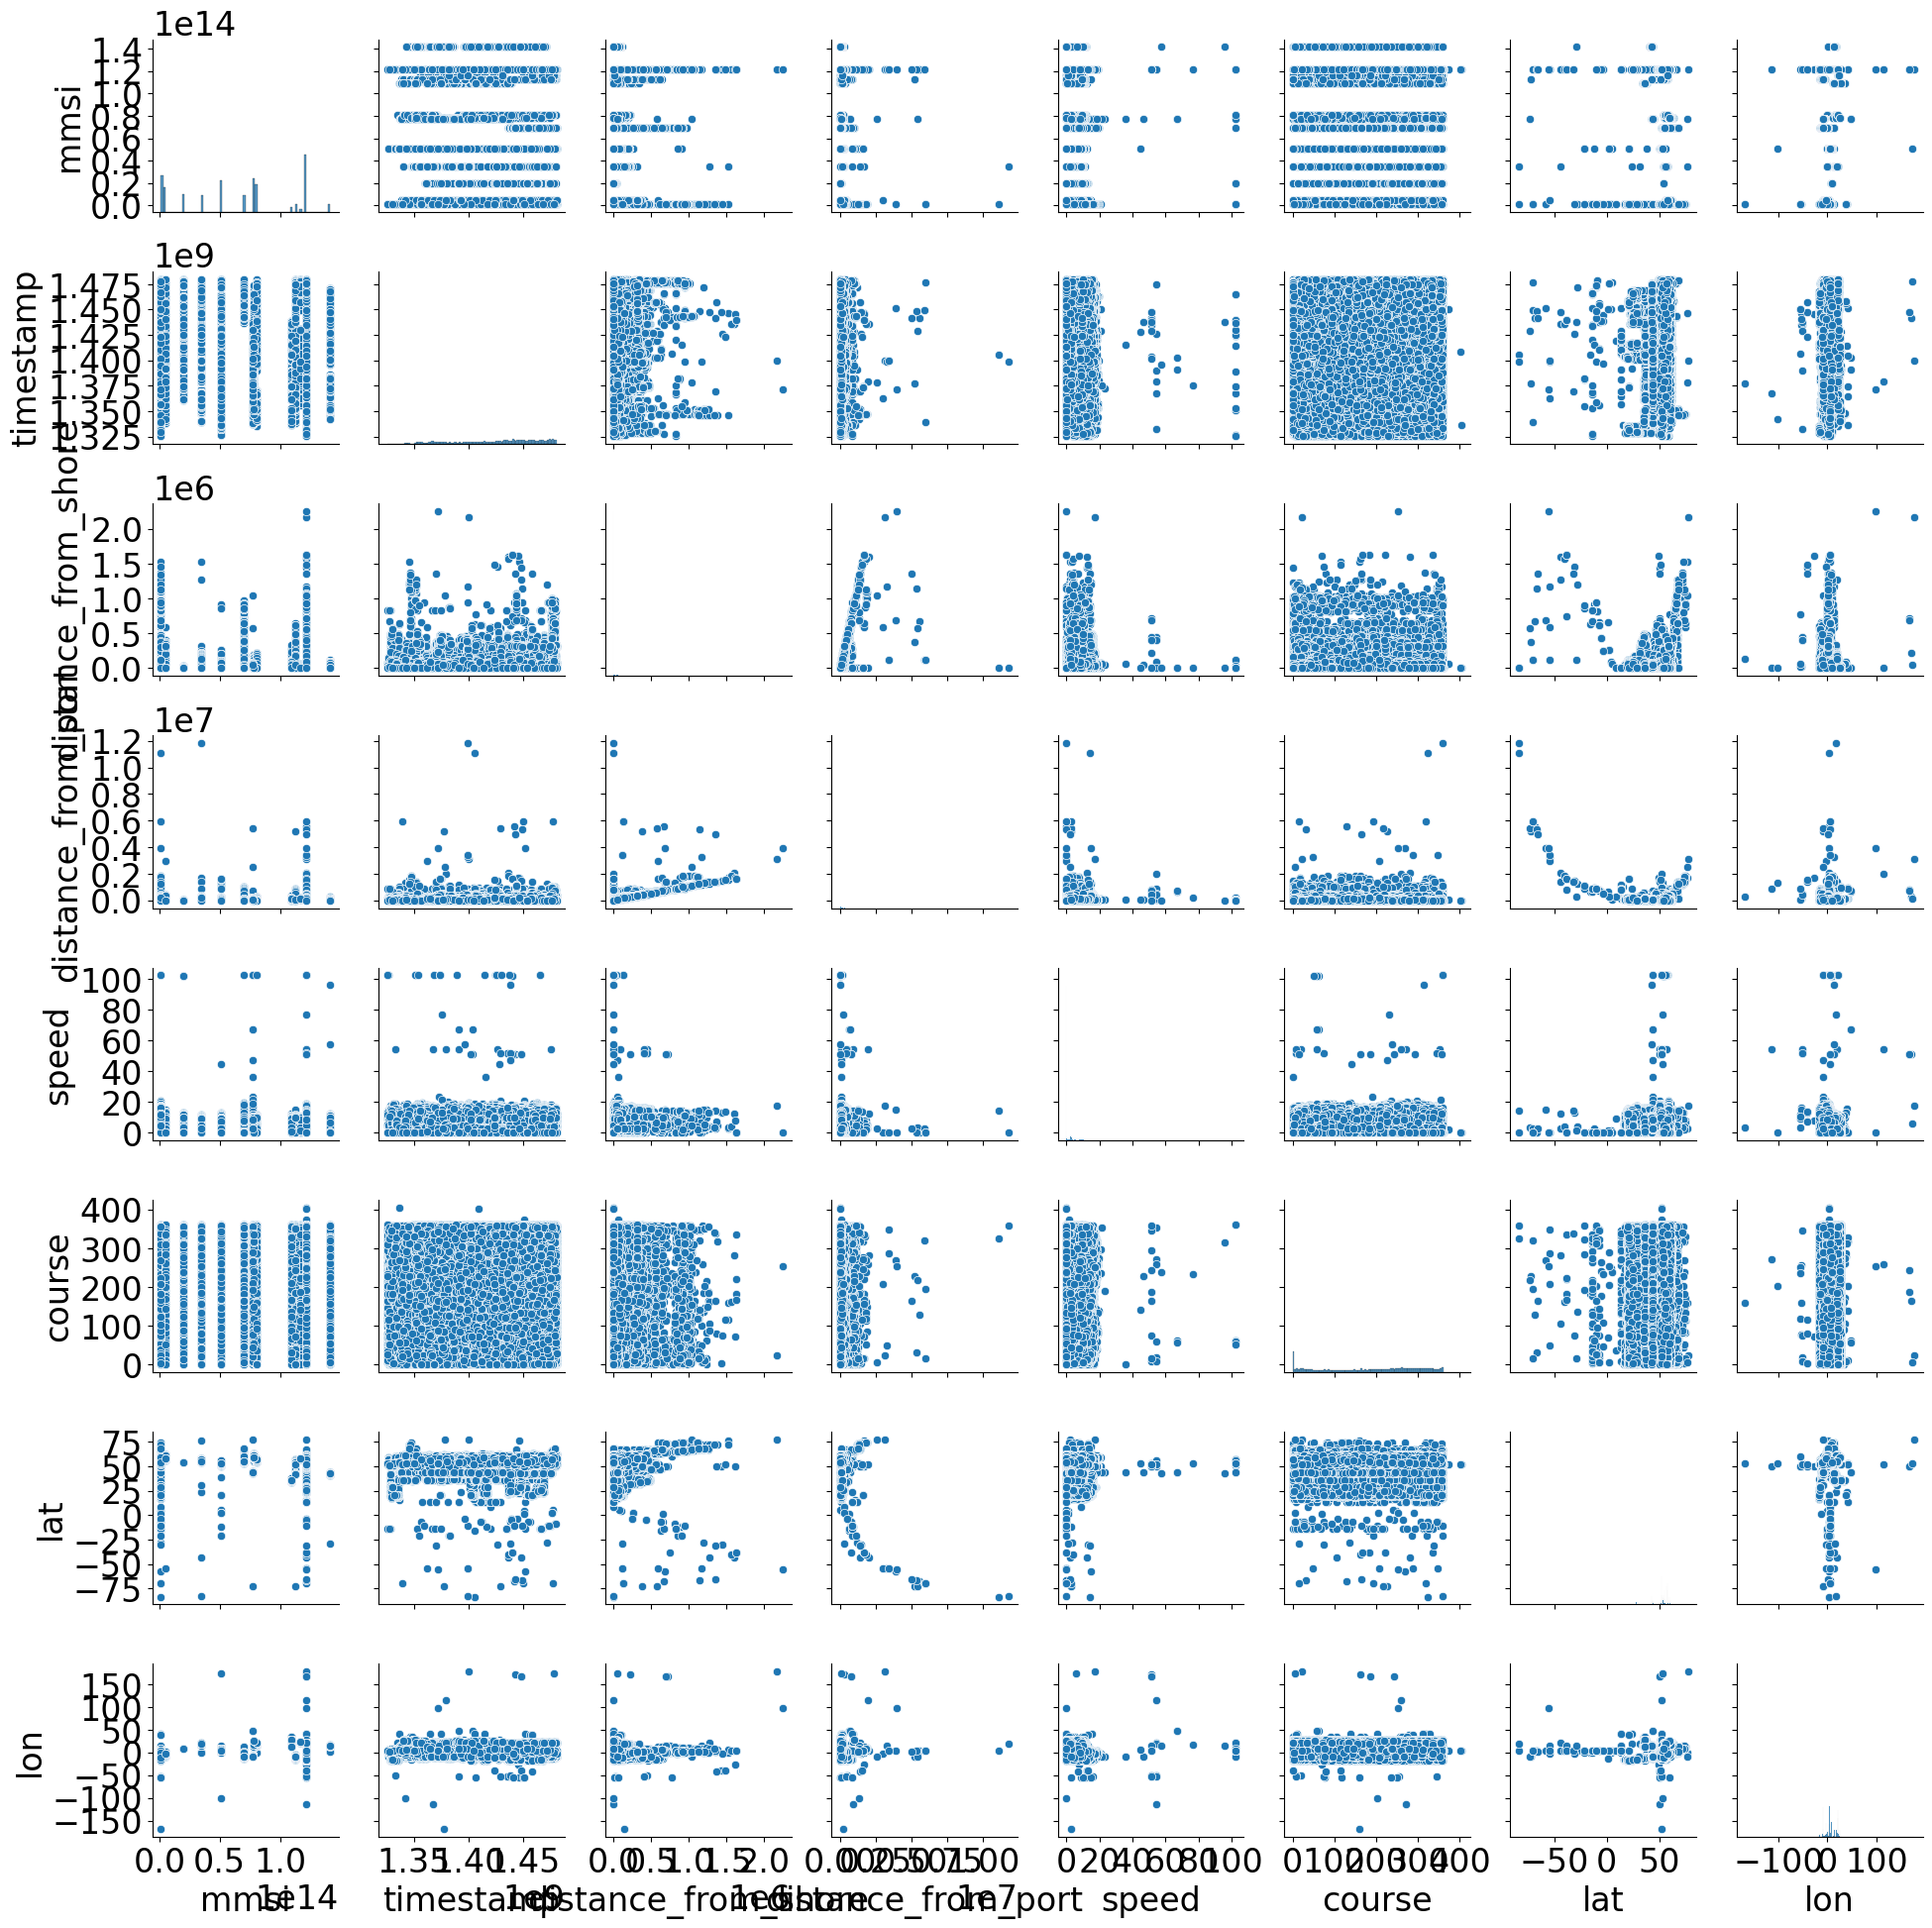

In [12]:
sns.pairplot(data=df1)
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 7})


# Applying Principal Component Analysis after scaling [0,1] the main training data

In [13]:
df_train1 = df.dropna().drop(columns = ['label'])
df_label1 = df['label']

In [14]:
df_train1

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
0,1.214265e+14,1.392605e+09,62239.937500,69998.281250,10.3,70.000000,50.052689,-1.631830
1,1.252340e+12,1.456972e+09,42952.410156,52477.277344,5.4,93.000000,20.688517,-17.457317
2,1.217392e+14,1.428162e+09,0.000000,2999.926270,0.0,99.000000,56.518200,20.990850
3,1.414316e+14,1.438086e+09,0.000000,999.975464,0.0,320.899994,42.356224,14.414068
4,1.985955e+13,1.438332e+09,11401.474609,49647.546875,3.1,129.100006,53.902554,8.275746
...,...,...,...,...,...,...,...,...
838854,5.110130e+13,1.342748e+09,0.000000,70347.406250,0.0,292.700012,53.408848,6.202929
838855,5.110130e+13,1.372087e+09,0.000000,10049.628906,0.0,343.600006,52.914463,4.797502
838856,5.145483e+12,1.440924e+09,0.000000,1999.950928,0.0,335.000000,57.695148,-2.002600
838857,3.491170e+13,1.446407e+09,136689.734375,181907.593750,2.3,183.500000,55.434978,18.964701


In [15]:
df_label1 = df_label1.reset_index(drop= True)

In [16]:
df_label1

0         no_label
1         no_label
2         no_label
3         no_label
4         no_label
            ...   
838851    no_label
838852    no_label
838853    no_label
838854    no_label
838855    no_label
Name: label, Length: 838856, dtype: object

In [17]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df_train1) # normalizing the features
# x.shape

np.mean(x),np.std(x)

(-8.006804743726809e-16, 0.9999999999999998)

In [18]:
x = pd.DataFrame(x) # Converting into a table
x 

,0,1,2,3,4,5,6,7
0,1.269951,-0.818950,0.477157,0.269550,2.135468,-0.990742,-0.298057,-0.669151
1,-1.422280,0.845596,0.193582,0.059210,0.827861,-0.789700,-4.220123,-2.066510
2,1.276956,0.100562,-0.437928,-0.534765,-0.613175,-0.737254,0.565518,1.328386
3,1.718120,0.357201,-0.437928,-0.558774,-0.613175,1.202364,-1.326046,0.747669
4,-1.005427,0.363565,-0.270297,0.025240,0.214087,-0.474151,0.216155,0.205668
...,...,...,...,...,...,...,...,...
838851,-0.305526,-2.108263,-0.437928,0.273741,-0.613175,0.955869,0.150213,0.022642
838852,-0.305526,-1.349534,-0.437928,-0.450133,-0.613175,1.400784,0.084180,-0.101454
838853,-1.335063,0.430588,-0.437928,-0.546770,-0.613175,1.325611,0.722719,-0.701890
838854,-0.668218,0.572381,1.571759,1.613021,0.000600,0.001357,0.420836,1.149481


In [19]:
from sklearn.decomposition import PCA

n_components=5 # Number of major features to work on

pca_FSH = PCA(n_components)
principalComponents_FSH = pca_FSH.fit_transform(x)

principal_FSH_scaled_Df = pd.DataFrame(data = principalComponents_FSH
             , columns = ['principal component '+str(i) for i in range(n_components)])
principal_FSH_scaled_Df

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4
0,1.782085,-0.611614,-1.897343,0.122270,0.062373
1,2.052803,-3.873511,0.811841,-1.558674,-0.877812
2,-1.293114,0.949682,-1.509731,-0.339507,0.110284
3,-0.776641,-0.583135,-0.826901,-0.142751,1.987758
4,-0.203221,0.138597,0.475205,-0.375395,-0.736799
...,...,...,...,...,...
838851,-0.287380,-0.143287,0.221116,2.347073,-0.074595
838852,-0.729972,-0.416424,0.624010,1.800648,0.470760
838853,-0.923996,-0.219067,2.057383,0.288282,0.229209
838854,1.296083,2.036300,0.674143,-0.317112,-0.235810


In [20]:
frames = [principal_FSH_scaled_Df, df_label1]
principal_FSH_scaled_Df = pd.concat(frames, axis=1)
principal_FSH_scaled_Df # Adding the labels after PCA


,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,label
0,1.782085,-0.611614,-1.897343,0.122270,0.062373,no_label
1,2.052803,-3.873511,0.811841,-1.558674,-0.877812,no_label
2,-1.293114,0.949682,-1.509731,-0.339507,0.110284,no_label
3,-0.776641,-0.583135,-0.826901,-0.142751,1.987758,no_label
4,-0.203221,0.138597,0.475205,-0.375395,-0.736799,no_label
...,...,...,...,...,...,...
838851,-0.287380,-0.143287,0.221116,2.347073,-0.074595,no_label
838852,-0.729972,-0.416424,0.624010,1.800648,0.470760,no_label
838853,-0.923996,-0.219067,2.057383,0.288282,0.229209,no_label
838854,1.296083,2.036300,0.674143,-0.317112,-0.235810,no_label


In [21]:
print('Explained variation per principal component: {}'.format(pca_FSH.explained_variance_ratio_))
var2 = pca_FSH.explained_variance_ratio_ # Variance of the extracted features

Explained variation per principal component: [0.27997494 0.18567108 0.15348151 0.12107835 0.11401326]


### As we can see that the variance for the above selected six principal components are almost distrubuted rather than being concentrated on one feature, we should be going with all eight features we have. 

In [22]:
# making the dataset again with labels after dropping the NaN values from the scaled data


from sklearn.decomposition import PCA

n_components=8 # Number of all features to work on in the scaled data

pca_FSH_f = PCA(n_components)
principalComponents_FSH_f = pca_FSH_f.fit_transform(x)

principal_FSH_scaled_Df_f = pd.DataFrame(data = principalComponents_FSH_f
             , columns = ['Feature '+str(i+1) for i in range(n_components)])
principal_FSH_scaled_Df_f

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8
0,1.782085,-0.611614,-1.897343,0.122270,0.062373,-1.007660,-0.681065,-0.119611
1,2.052803,-3.873511,0.811841,-1.558674,-0.877812,0.317485,1.700931,-0.310826
2,-1.293114,0.949682,-1.509731,-0.339507,0.110284,0.366697,0.049268,-0.069153
3,-0.776641,-0.583135,-0.826901,-0.142751,1.987758,1.172683,0.835693,-0.224718
4,-0.203221,0.138597,0.475205,-0.375395,-0.736799,-0.692167,0.303120,0.187984
...,...,...,...,...,...,...,...,...
838851,-0.287380,-0.143287,0.221116,2.347073,-0.074595,0.448173,0.059061,0.496895
838852,-0.729972,-0.416424,0.624010,1.800648,0.470760,0.319850,-0.049624,-0.013287
838853,-0.923996,-0.219067,2.057383,0.288282,0.229209,-0.229269,-0.532863,0.001671
838854,1.296083,2.036300,0.674143,-0.317112,-0.235810,0.122353,0.943248,-0.056021


In [23]:
frames = [principal_FSH_scaled_Df_f, df_label1]
principal_FSH_scaled_Df_fl = pd.concat(frames, axis=1)
principal_FSH_scaled_Df_fl # Adding the labels with the entire data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,label
0,1.782085,-0.611614,-1.897343,0.122270,0.062373,-1.007660,-0.681065,-0.119611,no_label
1,2.052803,-3.873511,0.811841,-1.558674,-0.877812,0.317485,1.700931,-0.310826,no_label
2,-1.293114,0.949682,-1.509731,-0.339507,0.110284,0.366697,0.049268,-0.069153,no_label
3,-0.776641,-0.583135,-0.826901,-0.142751,1.987758,1.172683,0.835693,-0.224718,no_label
4,-0.203221,0.138597,0.475205,-0.375395,-0.736799,-0.692167,0.303120,0.187984,no_label
...,...,...,...,...,...,...,...,...,...
838851,-0.287380,-0.143287,0.221116,2.347073,-0.074595,0.448173,0.059061,0.496895,no_label
838852,-0.729972,-0.416424,0.624010,1.800648,0.470760,0.319850,-0.049624,-0.013287,no_label
838853,-0.923996,-0.219067,2.057383,0.288282,0.229209,-0.229269,-0.532863,0.001671,no_label
838854,1.296083,2.036300,0.674143,-0.317112,-0.235810,0.122353,0.943248,-0.056021,no_label


# Removing Outliers


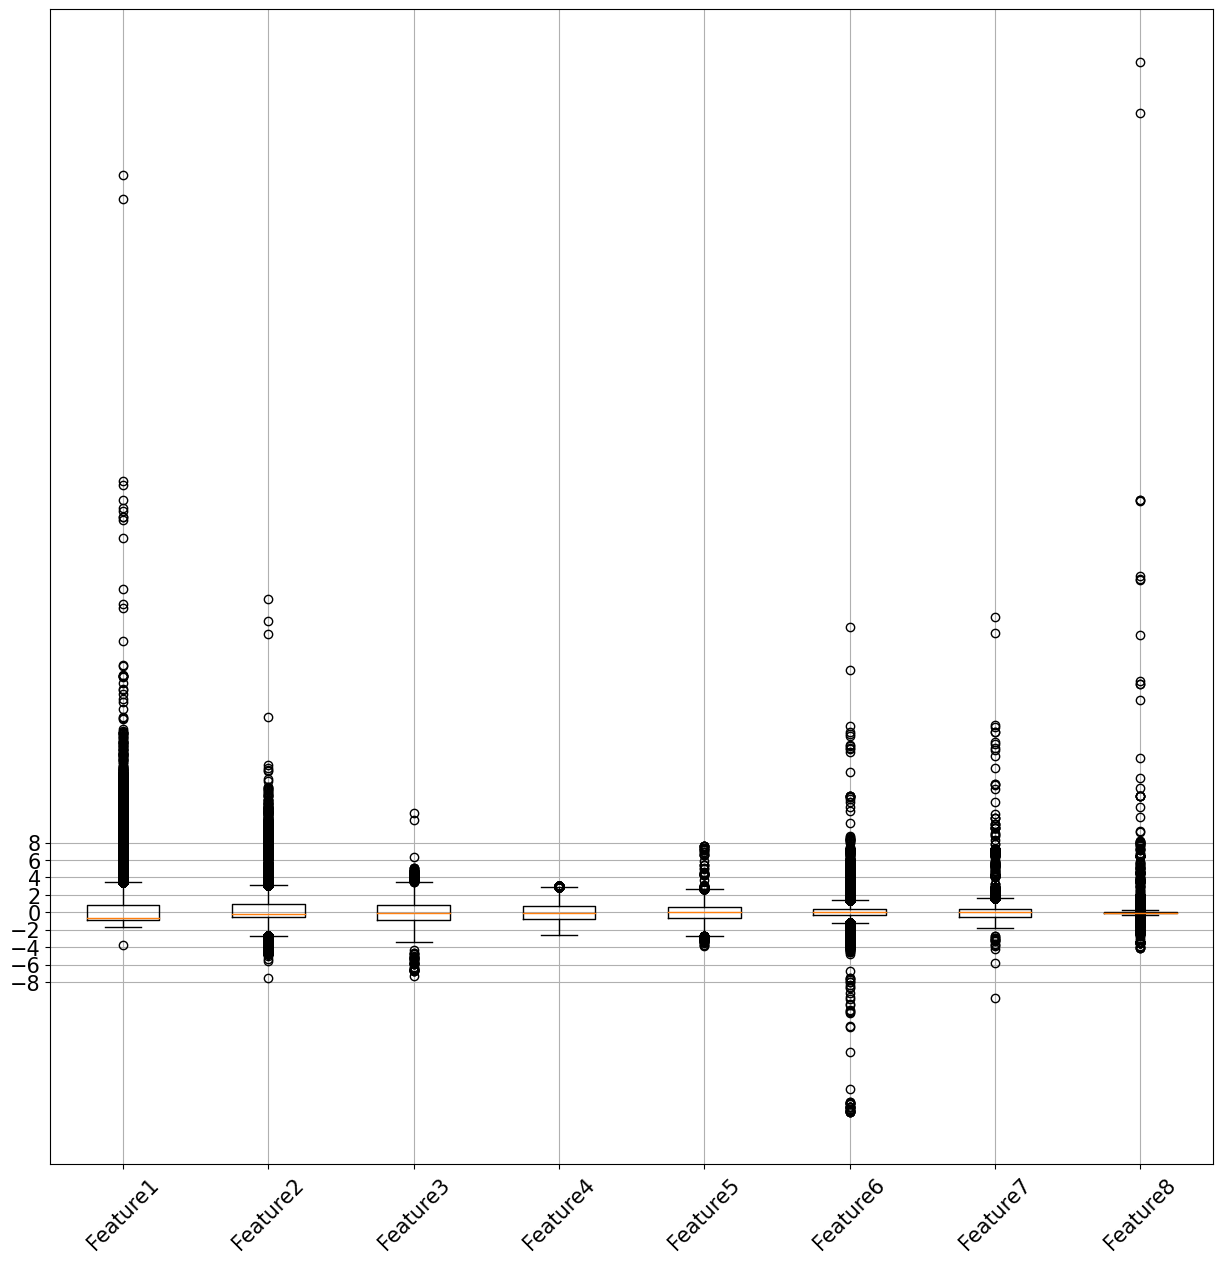

In [24]:
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 15})
ax = plt.subplot()
ax.boxplot(principal_FSH_scaled_Df_fl.drop(columns = 'label'))
plt.grid(True)
plt.yticks(np.linspace(-n_components,n_components, 9))
ax.set_xticklabels(labels = ['Feature'+str(i+1) for i in range(n_components)], rotation = 45);

In [25]:
principal_FSH_main = principal_FSH_scaled_Df_fl[(principal_FSH_scaled_Df_fl['Feature 8'] < 0.875) & (principal_FSH_scaled_Df_fl['Feature 8'] > -0.875)]
principal_FSH_main #after removing outliers

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,label
0,1.782085,-0.611614,-1.897343,0.122270,0.062373,-1.007660,-0.681065,-0.119611,no_label
1,2.052803,-3.873511,0.811841,-1.558674,-0.877812,0.317485,1.700931,-0.310826,no_label
2,-1.293114,0.949682,-1.509731,-0.339507,0.110284,0.366697,0.049268,-0.069153,no_label
3,-0.776641,-0.583135,-0.826901,-0.142751,1.987758,1.172683,0.835693,-0.224718,no_label
4,-0.203221,0.138597,0.475205,-0.375395,-0.736799,-0.692167,0.303120,0.187984,no_label
...,...,...,...,...,...,...,...,...,...
838851,-0.287380,-0.143287,0.221116,2.347073,-0.074595,0.448173,0.059061,0.496895,no_label
838852,-0.729972,-0.416424,0.624010,1.800648,0.470760,0.319850,-0.049624,-0.013287,no_label
838853,-0.923996,-0.219067,2.057383,0.288282,0.229209,-0.229269,-0.532863,0.001671,no_label
838854,1.296083,2.036300,0.674143,-0.317112,-0.235810,0.122353,0.943248,-0.056021,no_label


In [26]:
Outlier = principal_FSH_scaled_Df_fl[(principal_FSH_scaled_Df_fl['Feature 8'] > 0.875) | (principal_FSH_scaled_Df_fl['Feature 8'] < -0.875)]
Outlier

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,label
43,14.385316,9.676884,1.685346,-0.397420,-0.407960,4.621264,-0.374659,-1.136789,no_label
99,2.700625,-2.557706,0.327411,-1.113580,2.160077,1.751391,1.057462,1.280521,no_label
103,0.889847,1.472727,-2.120640,0.314631,0.063503,-1.162524,0.318414,0.943780,no_label
214,-0.111301,1.565258,-2.018151,0.933467,-0.776994,0.570232,0.246032,0.966274,no_label
406,-0.186853,1.598669,-1.833222,0.666631,-0.563652,0.603576,0.293407,0.876731,no_label
...,...,...,...,...,...,...,...,...,...
838725,0.592072,1.541986,-1.340972,-0.847293,1.039456,-1.260737,0.415282,0.901582,no_label
838762,0.023466,1.509095,-1.515796,0.515236,0.272627,-0.041422,0.335879,0.933598,not_fishing
838803,0.209641,-0.120766,-1.535938,-0.269333,-0.850631,1.039618,-0.719961,0.915845,no_label
838813,0.821156,-0.836283,-1.021256,1.467302,0.773514,1.551583,1.739158,1.069032,no_label


## Visualizing the Outliers

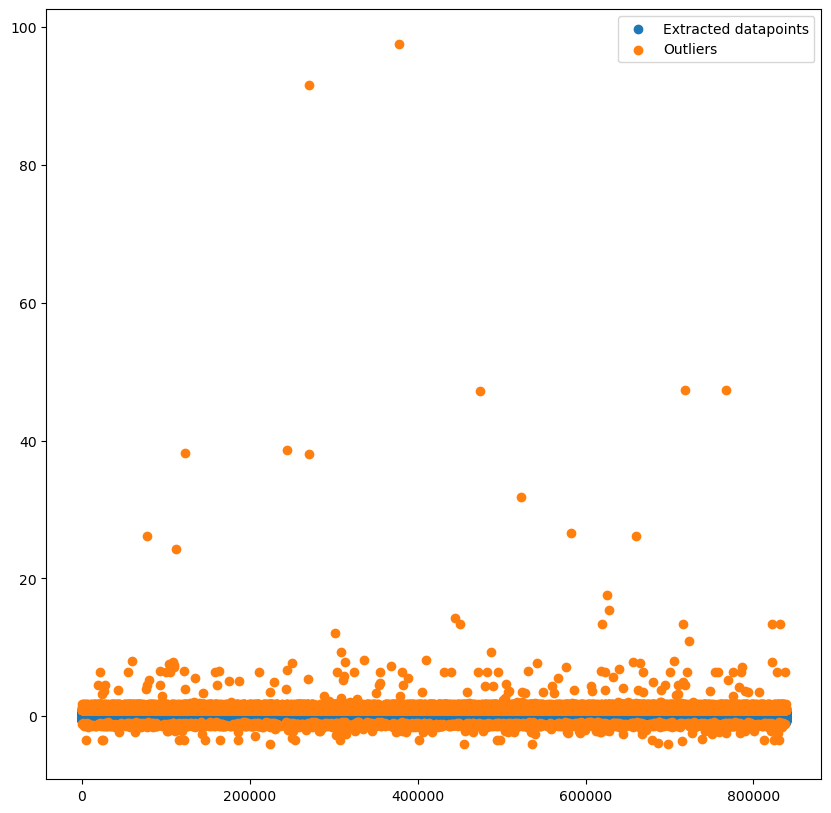

In [27]:
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})

plt.scatter(principal_FSH_main.index, principal_FSH_main['Feature 8'], label="Extracted datapoints")
plt.scatter(Outlier.index, Outlier['Feature 8'], label="Outliers")
plt.legend()

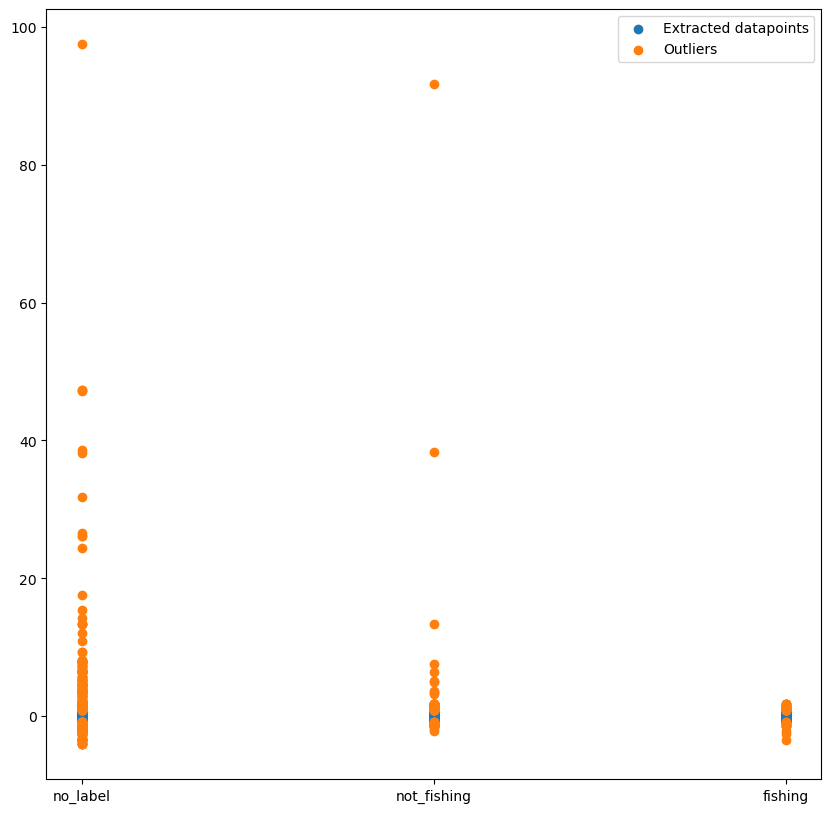

In [28]:
plt.scatter(principal_FSH_main['label'], principal_FSH_main['Feature 8'], label="Extracted datapoints")
plt.scatter(Outlier['label'], Outlier['Feature 8'], label="Outliers")

plt.legend()

# Data Training

## Making train test split (70% training data)

In [29]:
from sklearn.model_selection import train_test_split

df_train = principal_FSH_main.drop(columns = ['label'])
df_labels = principal_FSH_main.filter(['label'])
df_labels


f_train, f_test, train_label, test_label = train_test_split(df_train, df_labels, stratify = df_labels, train_size=0.70, random_state= 42)
f_train

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8
323609,-0.713498,-0.366341,0.265107,1.172831,-0.146082,0.279745,-0.091224,0.006052
505834,2.063484,-0.769372,0.071506,1.610818,-0.782490,-2.223332,0.266739,-0.273631
497647,-0.997708,-0.229255,1.929791,-0.808982,0.176106,-0.201284,0.338925,-0.098368
579168,-0.748796,-0.409136,1.154414,1.577259,-0.839975,-0.167605,-0.619916,0.017379
462788,-0.757119,-0.346250,1.069770,0.935677,-1.054111,-0.227202,-0.631924,0.026690
...,...,...,...,...,...,...,...,...
511175,-0.722560,-0.374950,-0.633855,1.081509,1.044319,0.790731,-0.535672,-0.052685
353727,1.000381,1.879613,1.483049,-0.126071,1.097386,-0.056428,1.014369,-0.039592
126082,-0.795716,-0.472971,0.717336,1.569881,0.586460,0.307599,-0.030661,-0.093719
632171,-1.354858,0.900318,-0.634282,0.724418,0.110665,0.045527,0.314961,-0.122454


In [30]:
train_label

,label
323609,no_label
505834,no_label
497647,no_label
579168,no_label
462788,no_label
...,...
511175,no_label
353727,not_fishing
126082,no_label
632171,no_label


## Speedrun with selected classifiers without manual parameter selection

In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score   

accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(f_train, train_label.values.ravel())
prediction = clf.predict(f_test)
accuracy_scores[3] = accuracy_score(test_label, prediction)*100
print('\033[1m'+'Support Vector Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[3]))

# Logistic Regression
clf = LogisticRegression(max_iter=10000).fit(f_train, train_label.values.ravel())
prediction = clf.predict(f_test)
accuracy_scores[0] = accuracy_score(test_label, prediction)*100
print('\033[1m'+'Logistic Regression accuracy:'+'\033[0m','{}%'.format(accuracy_scores[0]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(f_train, train_label.values.ravel())
prediction = clf.predict(f_test)
accuracy_scores[1] = accuracy_score(test_label, prediction)*100
print('\033[1m'+'K Nearest Neighbors Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[1]))

# Adaboost
clf = AdaBoostClassifier().fit(f_train, train_label.values.ravel())
prediction = clf.predict(f_test)
accuracy_scores[2] = accuracy_score(test_label, prediction)*100
print('\033[1m'+'Adaboost Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[2]))

Support Vector Classifier accuracy: 95.70288273340152%
Logistic Regression accuracy: 95.70288273340152%
K Nearest Neighbors Classifier accuracy: 95.66220711541405%
Adaboost Classifier accuracy: 95.70288273340152%


Text(0.5, 1.05, 'Accuracy table of the four above mentioned classifiers')

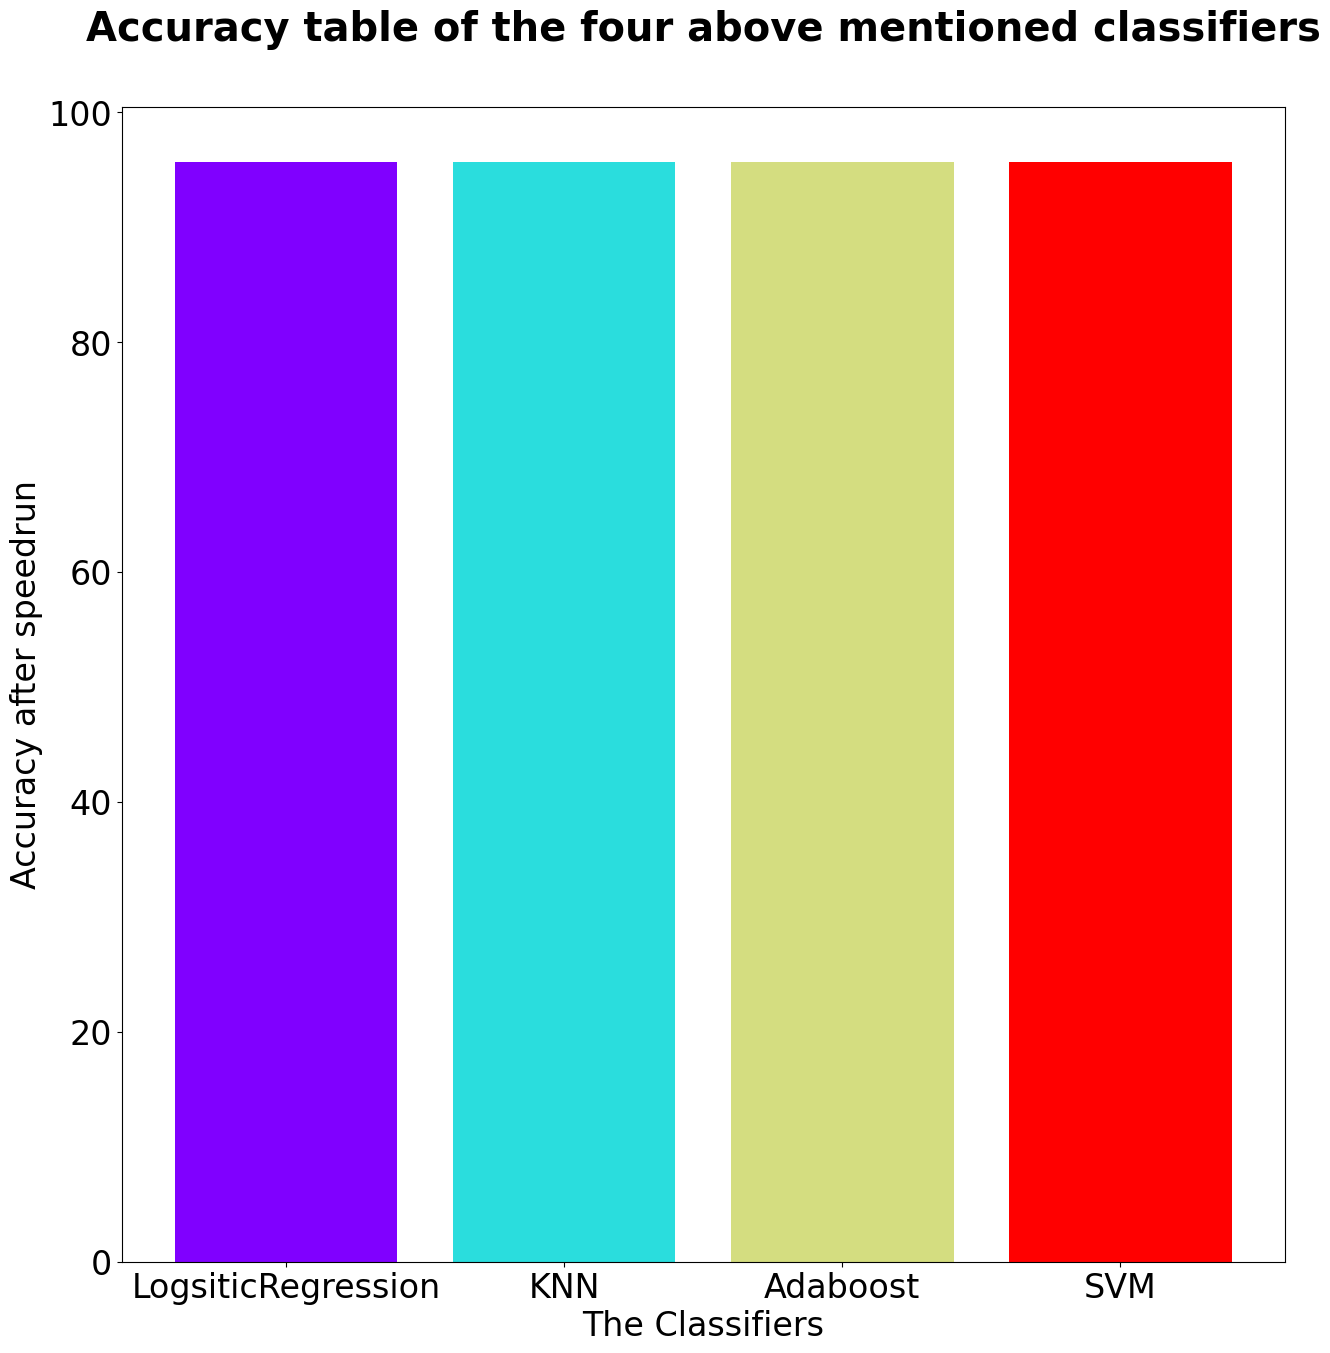

In [39]:
from matplotlib import cm

plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 24})
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['LogsiticRegression', 'KNN', 'Adaboost','SVM']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('The Classifiers')
plt.ylabel('Accuracy after speedrun')
plt.title('Accuracy table of the four above mentioned classifiers',fontweight='bold', y =1.05)

## KNN with f-score & Confusion matrix

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
clf_KNN = KNN.fit(f_train, train_label.values.ravel())
KNN_pred = KNN.predict(f_test)

tbl = np.reshape(KNN_pred, (len(KNN_pred),1))

                
dfKNN = pd.DataFrame(tbl)

y_true = test_label
y_pred = dfKNN
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     fishing       0.00      0.00      0.00      1717
    no_label       0.96      1.00      0.98    237636
 not_fishing       0.03      0.00      0.00      8953

    accuracy                           0.96    248306
   macro avg       0.33      0.33      0.33    248306
weighted avg       0.92      0.96      0.94    248306



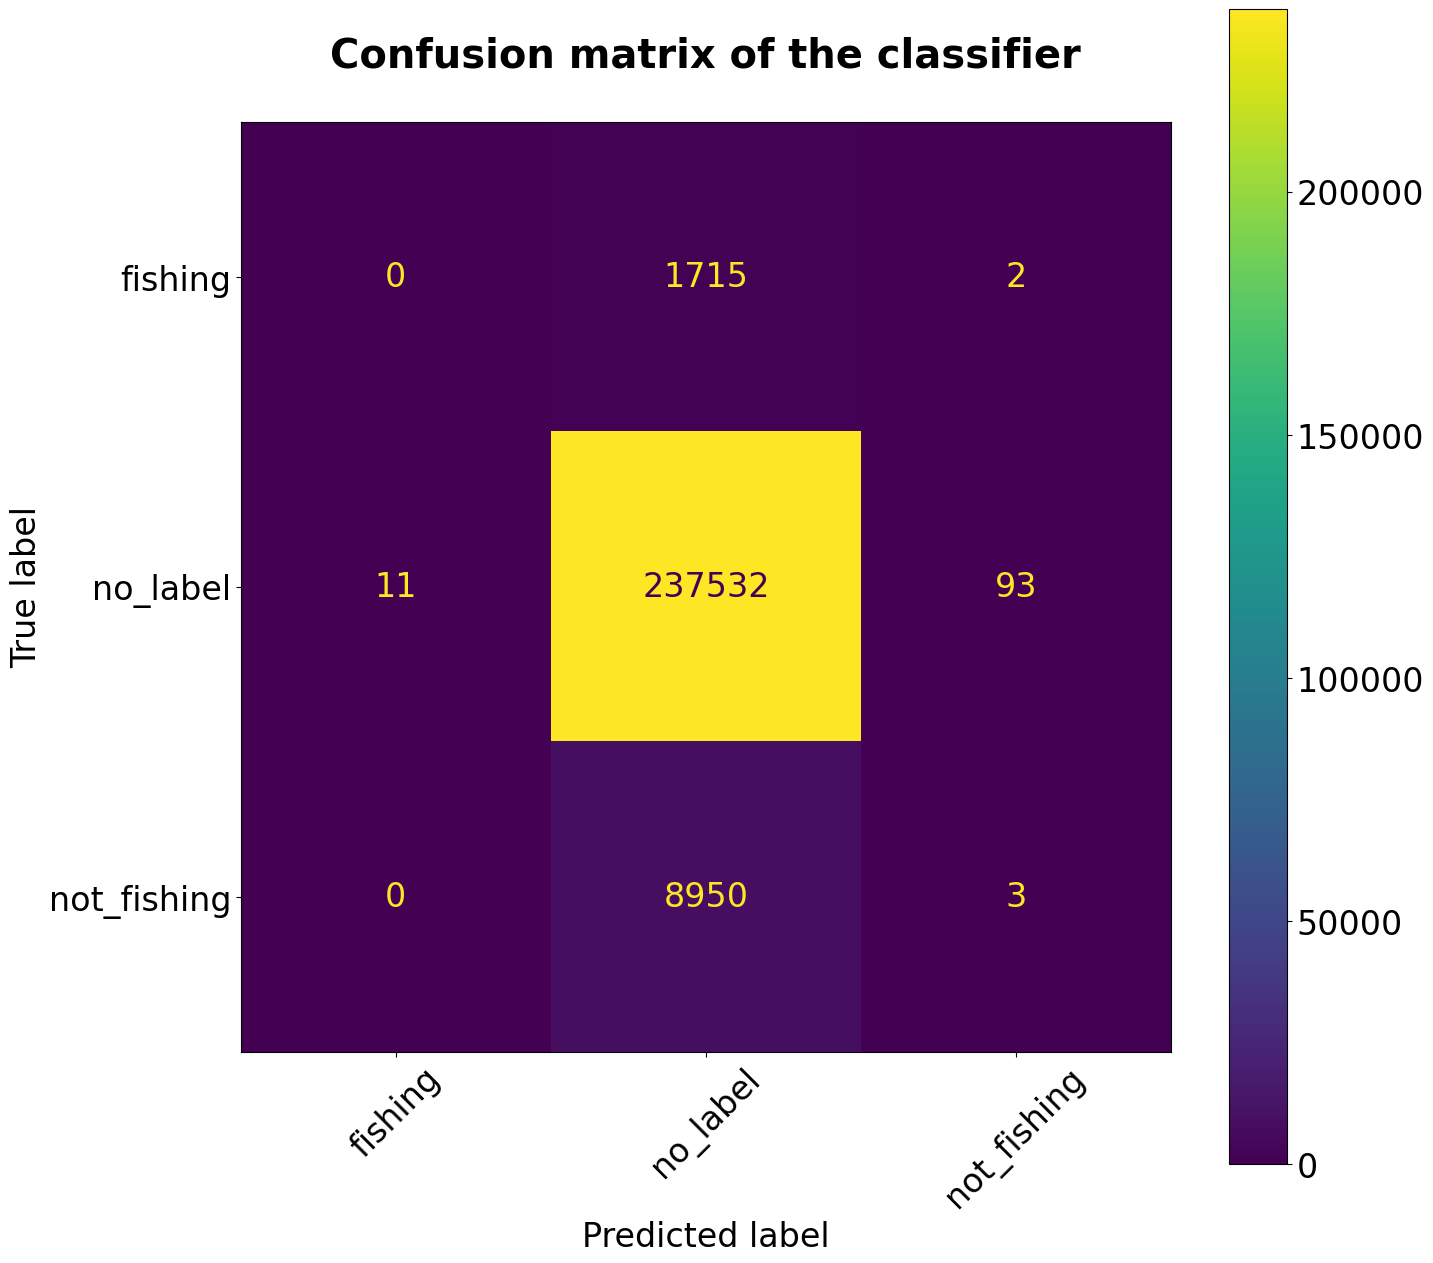

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_label, KNN_pred, labels=clf_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_KNN.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix of the classifier',fontweight='bold', y =1.05)

plt.show()

## SVM with f-score & Confusion matrix

In [42]:
from sklearn.svm import SVC
SVM = SVC()
clf_SVM = SVM.fit(f_train, train_label.values.ravel())
SVM_pred = SVM.predict(f_test)

tbl = np.reshape(SVM_pred, (len(SVM_pred),1))

                
dfSVM = pd.DataFrame(tbl)

y_true = test_label
y_pred = dfSVM
print(classification_report(y_true, y_pred, zero_division = 0 ))

              precision    recall  f1-score   support

     fishing       0.00      0.00      0.00      1717
    no_label       0.96      1.00      0.98    237636
 not_fishing       0.00      0.00      0.00      8953

    accuracy                           0.96    248306
   macro avg       0.32      0.33      0.33    248306
weighted avg       0.92      0.96      0.94    248306



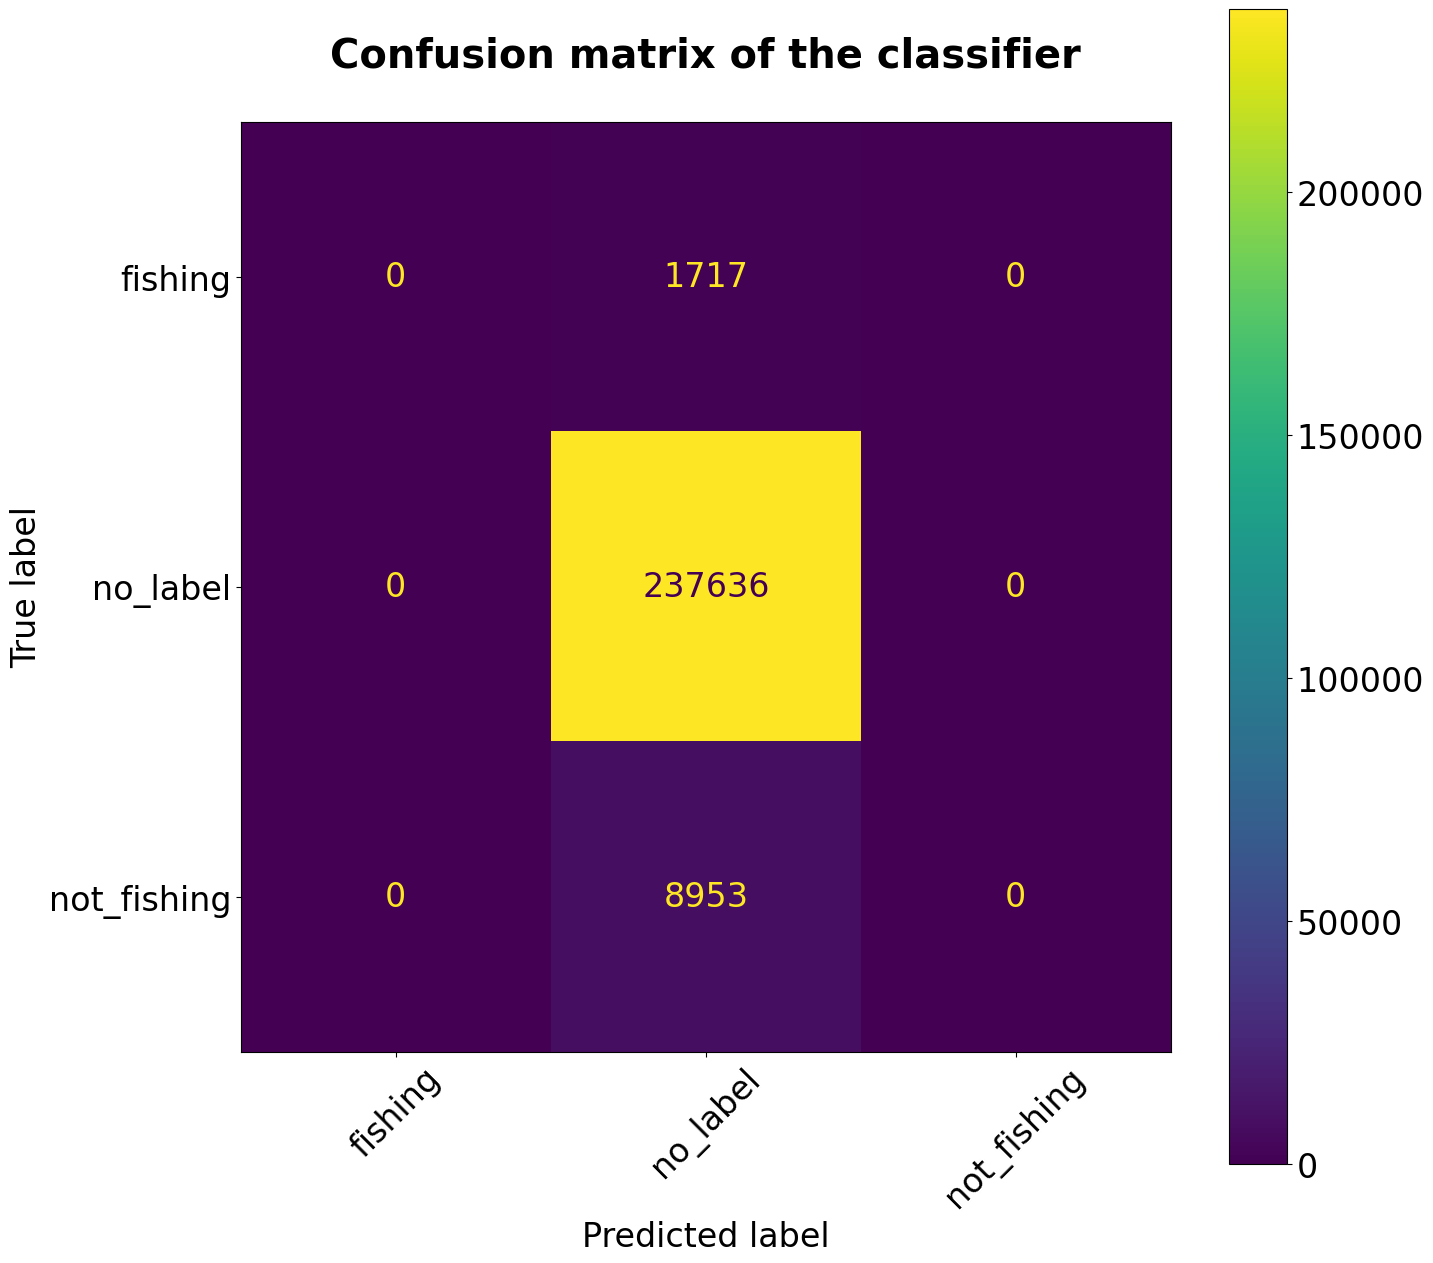

In [43]:
cm = confusion_matrix(test_label, SVM_pred, labels=clf_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_SVM.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix of the classifier',fontweight='bold', y =1.05)

plt.show()

## Logistic Regression with f-score & Confusion matrix

In [44]:
from sklearn.linear_model import LogisticRegression
LOG = LogisticRegression(max_iter=10000)
clf_LOG = LOG.fit(f_train, train_label.values.ravel())
LOG_pred = LOG.predict(f_test)

tbl = np.reshape(LOG_pred, (len(LOG_pred),1))

                
dfLOG = pd.DataFrame(tbl)

y_true = test_label
y_pred = dfLOG
print(classification_report(y_true, y_pred, zero_division = 0 ))

              precision    recall  f1-score   support

     fishing       0.00      0.00      0.00      1717
    no_label       0.96      1.00      0.98    237636
 not_fishing       0.00      0.00      0.00      8953

    accuracy                           0.96    248306
   macro avg       0.32      0.33      0.33    248306
weighted avg       0.92      0.96      0.94    248306



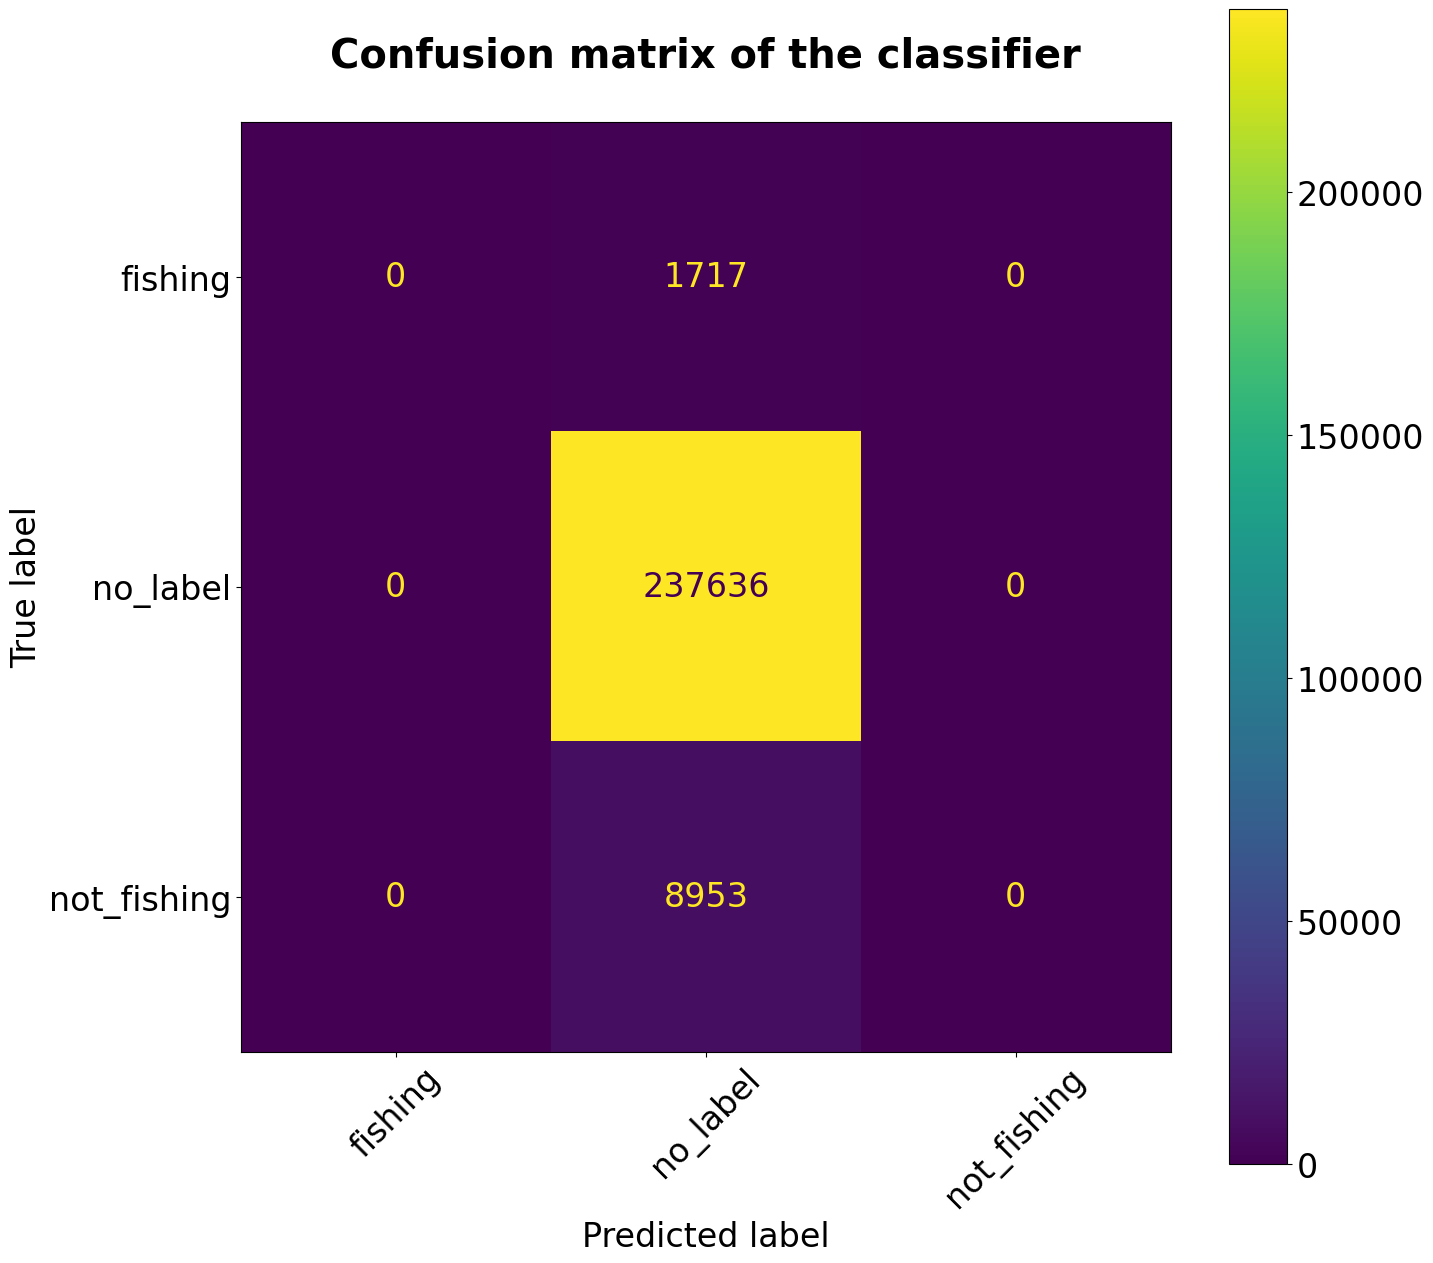

In [45]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(test_label, LOG_pred, labels=clf_LOG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_LOG.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix of the classifier',fontweight='bold', y =1.05)

plt.show()

## AdaBoost (with SVM boosting) with f-score & Confusion matrix

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
KNN = KNeighborsClassifier()
ADA = AdaBoostClassifier(n_estimators=2,base_estimator=SVC(probability=True, kernel='linear'))
clf_ADA = ADA.fit(f_train, train_label.values.ravel())
ADA_pred = ADA.predict(f_test)

tbl = np.reshape(ADA_pred, (len(ADA_pred),1))

                
dfADA = pd.DataFrame(tbl)

y_true = test_label
y_pred = dfADA
print(classification_report(y_true, y_pred, zero_division=0))

In [ ]:
cm = confusion_matrix(test_label, ADA_pred, labels=clf_ADA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_ADA.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix of the classifier',fontweight='bold', y =1.05)

plt.show()

## Parameter tuning for KNN using all feature vectors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
leaf_size = list(range(1,15))
n_neighbors = list(range(1,20))
p = [2]          #[1,2]
metric = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform']            #['uniform', 'distance']

# #Convert to dictionary
hyperparameters = dict(n_neighbors = n_neighbors,weights = weights, metric = metric, leaf_size = leaf_size, p = p )

# #Create new KNN object
KNN2 = KNeighborsClassifier()

# #Use GridSearch
clf = GridSearchCV(KNN2, hyperparameters, cv = 10)

# #Fit the model
best_model_KNN = clf.fit(f_train, train_label.values.ravel())

In [30]:
#Print The value of best Hyperparameters


print('Best leaf_size:', best_model_KNN.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_KNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_KNN.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model_KNN.best_estimator_.get_params()['weights'])
print('Best metric:', best_model_KNN.best_estimator_.get_params()['metric'])


Best_leaf_size = best_model_KNN.best_estimator_.get_params()['leaf_size']
Best_p = best_model_KNN.best_estimator_.get_params()['p']
Best_n_neighbors = best_model_KNN.best_estimator_.get_params()['n_neighbors']
Best_weights = best_model_KNN.best_estimator_.get_params()['weights']
Best_metric = best_model_KNN.best_estimator_.get_params()['metric']

Best leaf_size: 1
Best p: 2
Best n_neighbors: 11
Best weights: uniform
Best metric: euclidean


 ------------------------------
 Classification Report for SVM
 ------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     fishing     0.0000    0.0000    0.0000      1717
    no_label     0.9570    1.0000    0.9780    237636
 not_fishing     0.0000    0.0000    0.0000      8953

    accuracy                         0.9570    248306
   macro avg     0.3190    0.3333    0.3260    248306
weighted avg     0.9159    0.9570    0.9360    248306



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classifier accuracy: 95.70288273340152%


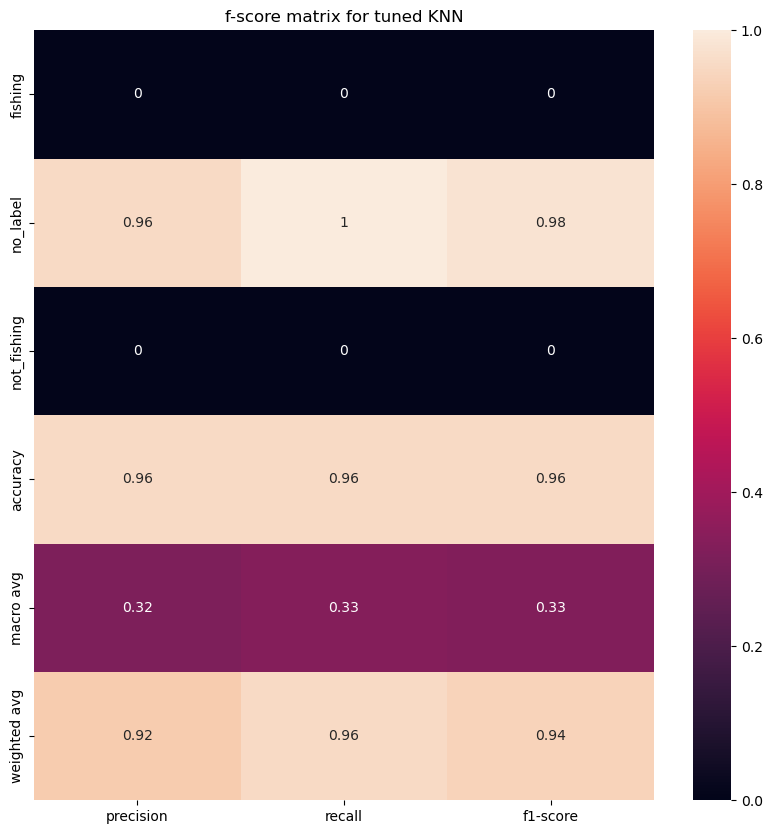

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
KNN = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', metric = 'euclidean', leaf_size = 1, p = 2)
clf_KNN = KNN.fit(f_train, train_label.values.ravel())
KNN_pred = KNN.predict(f_test)

tbl = np.reshape(KNN_pred, (len(KNN_pred),1))

                
dfKNN = pd.DataFrame(tbl)

y_true = test_label.reset_index(drop= True)
y_pred = dfKNN
print(' ------------------------------\n','\033[1m'+'\033[95m'+'Classification Report for SVM\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred, digits=4))
re = classification_report(y_true, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(re).iloc[:-1, :].T, annot=True)
plt.title ('f-score matrix for tuned KNN')
accuracy_scores_KNN = accuracy_score(y_true, y_pred)*100
print('\033[1m'+'\033[92m'+'KNN Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores_KNN))

                          -------------------------
                          Confusion Matrix for KNN
                          -------------------------


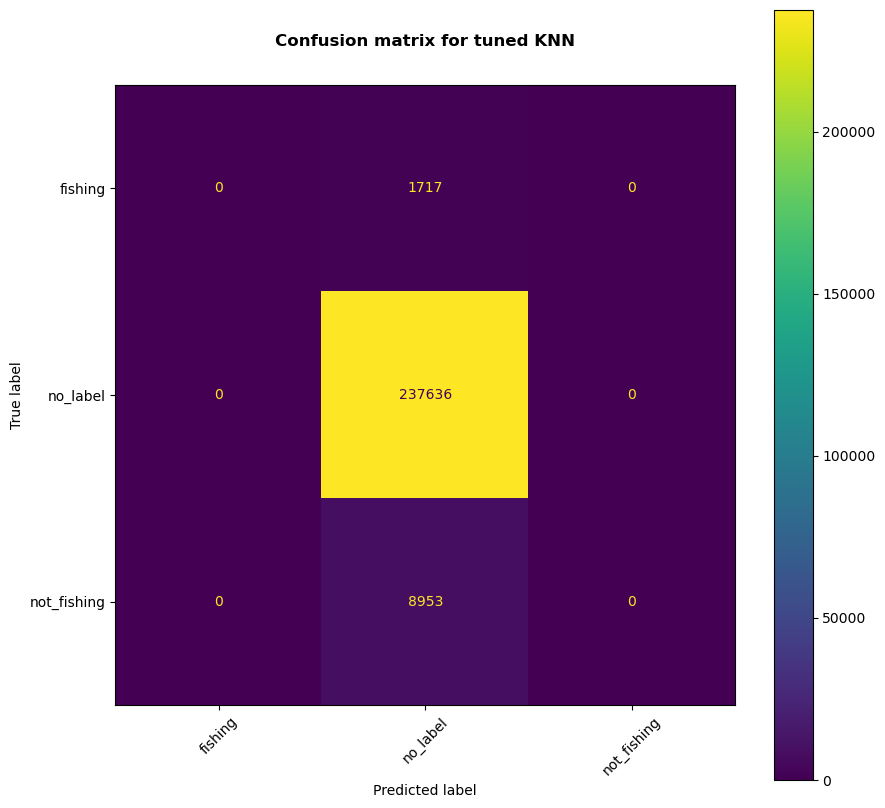

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for KNN\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(test_label, KNN_pred, labels=clf_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_KNN.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for tuned KNN',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

# Using our best and accurate model KNN

In [37]:
df2_fin = df2.rename(columns = {'mmsi': 'Feature 1', 'timestamp': 'Feature 2', 'distance_from_shore': 'Feature 3', 'distance_from_port': 'Feature 4', 'speed': 'Feature 5', 'course': 'Feature 6', 'lat': 'Feature 7', 'lon': 'Feature 8', })

In [41]:
df2_fin = df2_fin.dropna()

In [42]:
best_model = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', metric = 'euclidean', leaf_size = 1, p = 2)
clf_KNN = best_model.fit(df_train, df_labels.values.ravel())
KNN_pred_test = best_model.predict(df2_fin)

KNN_pred_test = pd.DataFrame(KNN_pred_test)
print(KNN_pred_test)

np.savetxt("Saheli_test_data_Class_labels.txt", KNN_pred_test, fmt ="%s")

               0
0       no_label
1       no_label
2       no_label
3       no_label
4       no_label
...          ...
209708  no_label
209709  no_label
209710  no_label
209711  no_label
209712  no_label

[209713 rows x 1 columns]


## 